# Kaggle dataset

: https://www.kaggle.com/hellbuoy/car-price-prediction

# Business Problem

Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



# 1. Frameworks 

In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , KFold , cross_val_score,StratifiedKFold
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import functools




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 3. Data Preparation

Let's import the data and visualize the five first lines.

In [ ]:
df_price = pd.read_csv('CarPrice_Assignment.csv')

In [ ]:
df_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Visualizing some information about our dataset like total of columns and lines and the null values.

In [ ]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

First let's drop the column car_Id because we do not need it.

In [ ]:
df_price.drop('car_ID',axis=1.,inplace=True)

In [ ]:
def missing_values(data):
    
    # Null total 
    missing_values = data.isnull().sum()
    
    # Order nulls 
    total = missing_values.sort_values(ascending=True)
    
    # Percentage  
    percent = (missing_values / len(data.index)*100).round(2).sort_values(ascending=True)

    table_missing = pd.concat([total, percent], axis=1, keys=['Number of Nulls', 'Percentagem of Nulls'])
  
    return table_missing.tail(10)



We do not have Null values on our dataset

In [ ]:
missing_values(df_price)

,Number of Nulls,Percentagem of Nulls
wheelbase,0,0.0
enginelocation,0,0.0
drivewheel,0,0.0
carbody,0,0.0
doornumber,0,0.0
aspiration,0,0.0
fueltype,0,0.0
CarName,0,0.0
carheight,0,0.0
price,0,0.0


Suspects outiliers values

In this boxplot we can see that we have a few values from 30000 $. These values may be outiliers.

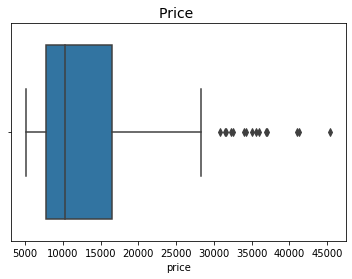

In [ ]:
plt.title('Price ', fontsize=14)
sns.boxplot(x= df_price['price']);

Here we are going to use a statistical method to calculate if those points are outliers

In [ ]:
def Calculate_outliers(Q3,Q1):
  #subtract the first quartile from the third quartile ,Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
  IQR = (Q3 - Q1) * 1.5
  #Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
  outlier_sup =  Q3 + IQR 
 #Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.
  outlier_inf = - Q1 - IQR 
  return round(outlier_inf) , round(outlier_sup)





In [ ]:
Calculate_outliers(16503,7788)

(-20860, 29576)

Verifing the quantity and percentage  of outliers in the data

In [ ]:
Up_outlier = df_price.query('price>=29576')

In [ ]:
Quant_Up_out = Up_outlier['price'].value_counts().sum()

Quant_Up_out

15

In [ ]:
 Down_outlier = df_price.query('price<=-20860')



In [ ]:
Quant_Down_out = Down_outlier['price'].value_counts().sum()

Quant_Down_out

0

7 % or 15 values on our data are possible outliers 

In [ ]:
Perc_out= round((Quant_Up_out + Quant_Down_out)/len(df_price)*100)
Perc_out

7.0

We can see the outliers we do no have any values that are wrong data they are just out of the distribution data.

In [ ]:
out = pd.DataFrame(Up_outlier['price'])

out.reset_index(drop= True )

,price
0,30760.0
1,41315.0
2,36880.0
3,32250.0
4,35550.0
5,36000.0
6,31600.0
7,34184.0
8,35056.0
9,40960.0


Usualy variables with names might have some kind of typo , let's verify

In [ ]:
df_price['CarName'] = df_price['CarName'].str.split(' ',expand=True)

In [ ]:
 df_price['CarName'].unique()



array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We can see some names are wrong , mazda,porcshce,toyouta ....

In [ ]:
df_price['CarName'] = df_price['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

Let's repalce the wrong names with the method replace 

In [ ]:
df_price['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# 2. Exploratory Data analysis 

Now let's see some statistics about the data

In [ ]:
df_price.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We can see that the vehicles' mean price is 13276 , the lowest value is 5118 ,the highest is 45400 and the standard daviation is 7988 dolares , soon we are going to verify if there are any outliers in our data.    

In [ ]:
distr = df_price.select_dtypes(exclude= object)

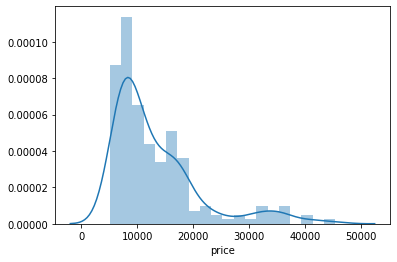

In [ ]:
sns.distplot(df_price['price'],bins=20);

Let's see our data without the outliers

In [ ]:
df_without_outl = df_price.query('price<29576')

In [ ]:
df_without_outl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         190 non-null    int64  
 1   CarName           190 non-null    object 
 2   fueltype          190 non-null    object 
 3   aspiration        190 non-null    object 
 4   doornumber        190 non-null    object 
 5   carbody           190 non-null    object 
 6   drivewheel        190 non-null    object 
 7   enginelocation    190 non-null    object 
 8   wheelbase         190 non-null    float64
 9   carlength         190 non-null    float64
 10  carwidth          190 non-null    float64
 11  carheight         190 non-null    float64
 12  curbweight        190 non-null    int64  
 13  enginetype        190 non-null    object 
 14  cylindernumber    190 non-null    object 
 15  enginesize        190 non-null    int64  
 16  fuelsystem        190 non-null    object 
 1

In [ ]:
df_without_outl.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,0.836842,98.276316,172.811579,65.635263,53.755263,2480.031579,118.415789,3.303579,3.251263,10.183789,97.231579,5124.473684,25.947368,31.521053,11509.400879
std,1.230009,5.280965,11.375806,1.844961,2.425645,445.890595,26.854315,0.261671,0.304045,4.015859,30.225940,471.593591,6.212921,6.476419,4968.444389
min,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,20.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2128.000000,97.000000,3.130000,3.127500,8.700000,70.000000,4800.000000,21.000000,26.000000,7701.250000
50%,1.000000,96.500000,172.500000,65.400000,54.100000,2395.000000,110.000000,3.270000,3.290000,9.000000,92.000000,5200.000000,25.000000,31.000000,9959.500000
75%,2.000000,100.400000,178.350000,66.500000,55.500000,2823.750000,136.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,15197.500000
max,3.000000,114.200000,198.900000,71.400000,59.800000,3750.000000,183.000000,3.940000,3.900000,23.000000,200.000000,6600.000000,49.000000,54.000000,28248.000000


We can see that the vehicles' mean price is now 11509 ,the highest is 28248 and the standard desviation is 4968 dolares . Further we are going to test how much this values afect our model.




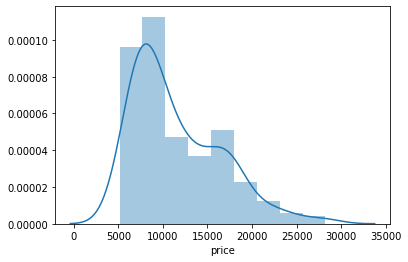

In [ ]:
sns.distplot(df_without_outl['price'])

Now the names are correct we can work with this feature

First we are going to analize the categorical columns 

In [ ]:
categ_feat = df_price.select_dtypes(include= ['object'],)

print(categ_feat.columns)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [ ]:
df_price['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

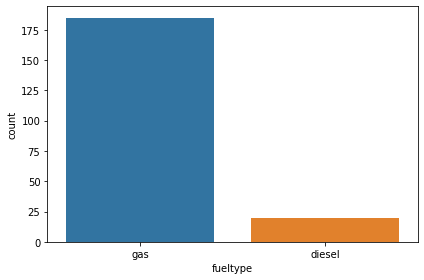

In [ ]:
sns.countplot(x='fueltype'  ,data= df_price)
plt.tight_layout()

In [ ]:
Fuelprice = df_price.groupby('fueltype')[['price']]
display(Fuelprice.agg(['mean', 'median','max','min']))


price                          
                mean   median      max     min
fueltype                                      
diesel    15838.1500  13852.5  31600.0  7099.0
gas       12999.7982   9989.0  45400.0  5118.0

Most of our fueltype are gasoline.However , the diesel cars are on average 3000 $ more expensive than the gasoline's car


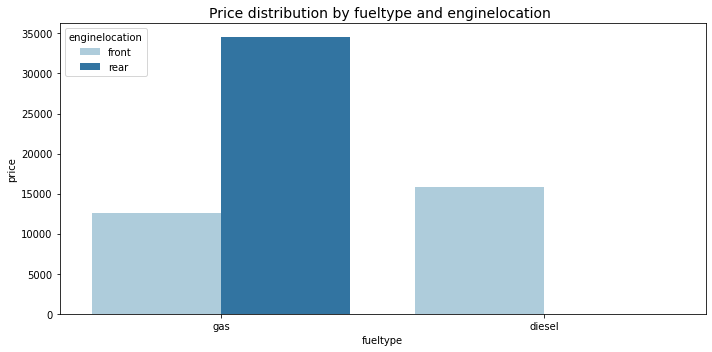

In [ ]:
plt.figure( figsize=(10,5))
plt.title('Price distribution by fueltype and enginelocation ', fontsize=14)
sns.barplot(x= 'fueltype', y=df_price['price'],hue='enginelocation', data=df_price, palette='Paired',orient='v',ci=None)
plt.tight_layout()


On this grafic we can see that we do no have diesel cars with engine location on rear, diesel cars price has on average  a higher price than gasoline cars with front engine.

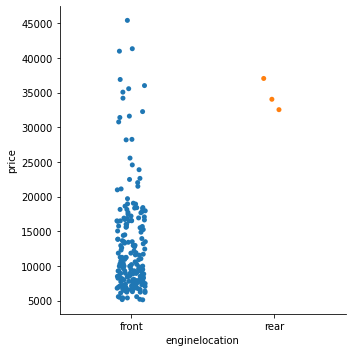

In [ ]:
sns.catplot(x= 'enginelocation',y= 'price',data= df_price);

In [ ]:
df_price['enginelocation'].value_counts()


front    202
rear       3
Name: enginelocation, dtype: int64

In [ ]:
enginelo_price = df_price.groupby('enginelocation')['price']
display(enginelo_price.agg(['mean', 'median','max','min','std']))


,mean,median,max,min,std
enginelocation,,,,,
front,12961.097361,10221.5,45400.0,5118.0,7607.984118
rear,34528.000000,34028.0,37028.0,32528.0,2291.287847


We only have three cars with rear engine location on our data , we need to see if this feature is applicable to our model or this feature will skew our model. On average cars with rear engine location are more expensive than front engine cars.

In [ ]:
df_price['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

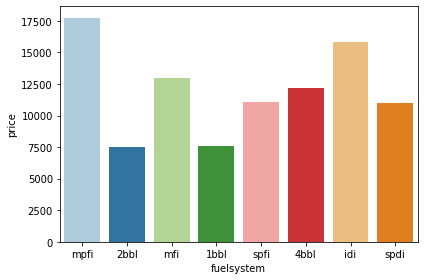

In [ ]:
sns.barplot(x= 'fuelsystem', y=df_price['price'], data=df_price, palette='Paired',orient='v',ci=None)
plt.tight_layout()

Cars with MPFI and IDI fuelsystem are on average the most expensive models and 2bbl and lbbl fuelsystem are the cheapest models

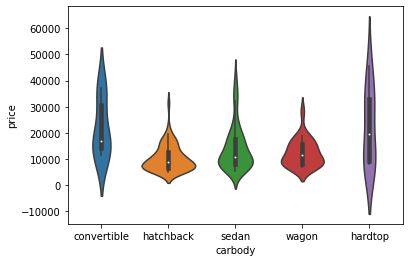

In [ ]:
sns.violinplot(x='carbody',y= 'price',data=df_price);

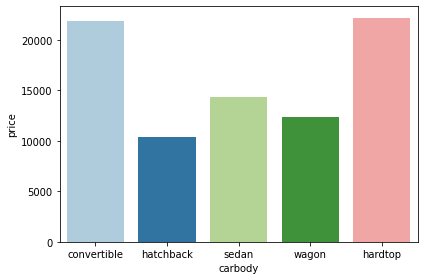

In [ ]:
sns.barplot(x= 'carbody', y=df_price['price'], data=df_price, palette='Paired',orient='v',ci=None)
plt.tight_layout()

Convertible and Hardtop cars are the most expensive models and models between 10000 and 15000 are most hatchback,sedan and wagon models

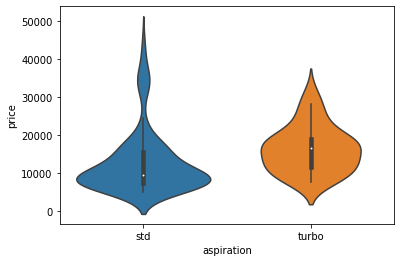

In [ ]:
sns.violinplot(x='aspiration',y= 'price',data=df_price);


Most of the values of the std vehicles are between $10000 
and turbo are equaly distributed between 10000  and  20000

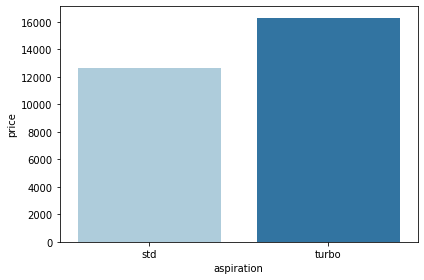

In [ ]:
sns.barplot(x= 'aspiration', y=df_price['price'], data=df_price, palette='Paired',orient='v',ci=None)
plt.tight_layout()

Turbo vehicles are more expensive than std vehicles

In [ ]:
enginelo_price = df_price.groupby('aspiration')['price']
display(enginelo_price.agg(['mean', 'median','max','min']))


,mean,median,max,min
aspiration,,,,
std,12611.270833,9418.0,45400.0,5118.0
turbo,16298.166676,16503.0,31600.0,7689.0


On average turbo cars are 3400  more expensives  than Std cars 

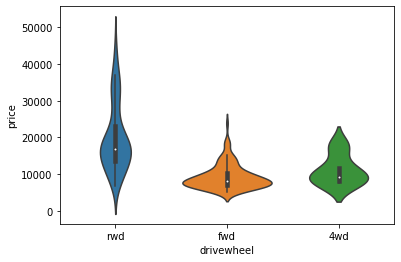

In [ ]:
sns.violinplot(x='drivewheel',y= 'price',data=df_price);

We can see most of rwd drivewheel are distributed from 10000 to 20000,most of fwd cars are between 10000 and 4wd are distributed between 1000 to 20000


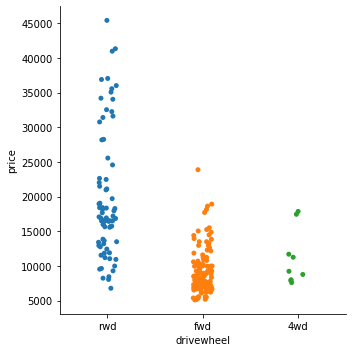

In [ ]:
sns.catplot(x= 'drivewheel',y= 'price',data= df_price);

In [ ]:
df_price['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

we only have a few values on the 4wd category , most the data are fwd and rwd cars on the catplot we can see that rwd has a  more spaced distribution while the fwd are concentrated between 500 and 15000

In [ ]:
 'enginetype', 'cylindernumber'

('enginetype', 'cylindernumber')

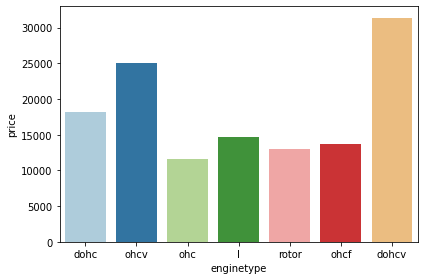

In [ ]:
sns.barplot(x= 'enginetype', y=df_price['price'], data=df_price, palette='Paired',orient='v',ci= None)
plt.tight_layout()

Dohcv  and Ohcv are on average more expensives than the other enginetypes.

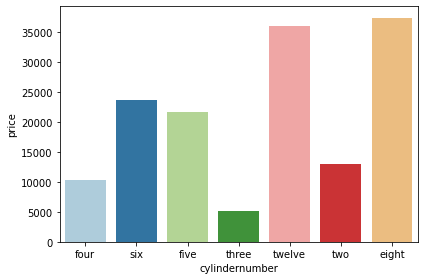

In [ ]:
sns.barplot(x= 'cylindernumber', y=df_price['price'], data=df_price, palette='Paired',orient='v',ci= None)
plt.tight_layout()

Cars with eight and twelve cylinders are on average more expensive and the cheepest models are the three and four cylinder.

Now we are going to analise the numeric features

In [ ]:
num_features = df_price.select_dtypes(exclude= object)

num_features.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


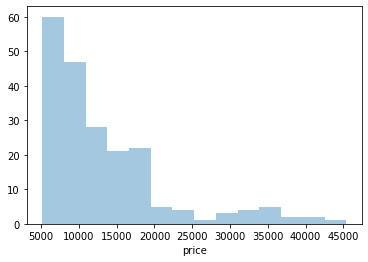

In [ ]:
sns.distplot(df_price['price'],kde = False);


Our prices are not a normal distribution , most of our prices are distributed between 5000 abd 20000 

Let's split our numeric dataset in three parts in order to visualize better the  pairplot 

In [ ]:
features_1 = num_features.drop(['symboling','wheelbase','carlength','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower'],axis=1)

features_2 = num_features[['symboling','wheelbase','carlength','carheight','curbweight','price']]

features_3 = num_features[['enginesize','boreratio','stroke','compressionratio','horsepower','price']]


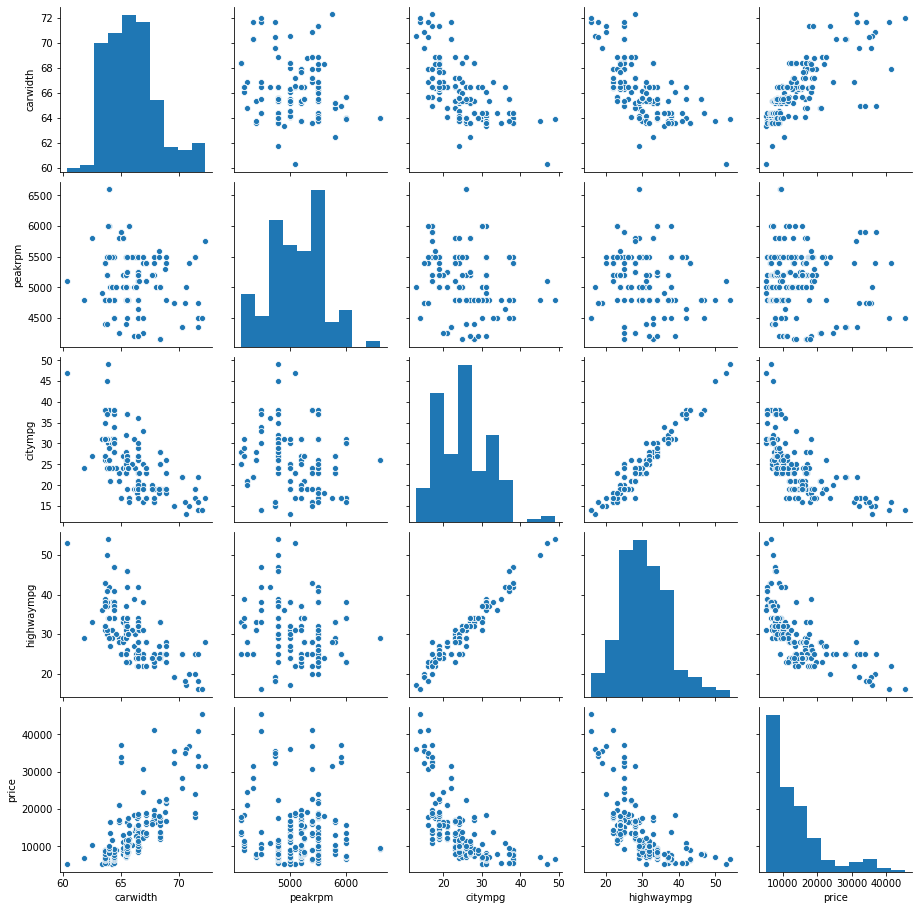

In [ ]:
sns.pairplot(features_1)

Some features looks like do no have a strong correlation let's see them better with Implot

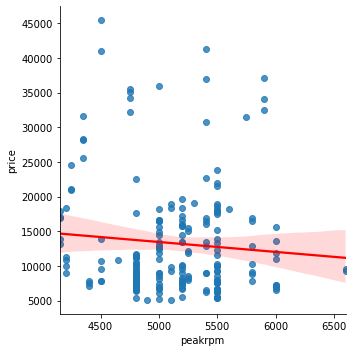

In [ ]:
sns.lmplot(x='peakrpm',y='price',data=features_1, line_kws={"color":"red"});

Peakrpm has a weak correlation with price 

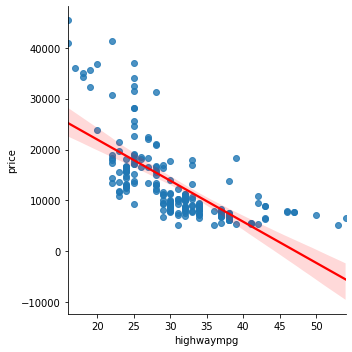

In [ ]:
sns.lmplot(x='highwaympg',y='price',data=features_1, line_kws={"color":"red"});

Highwaympg has a strong correlation with price 

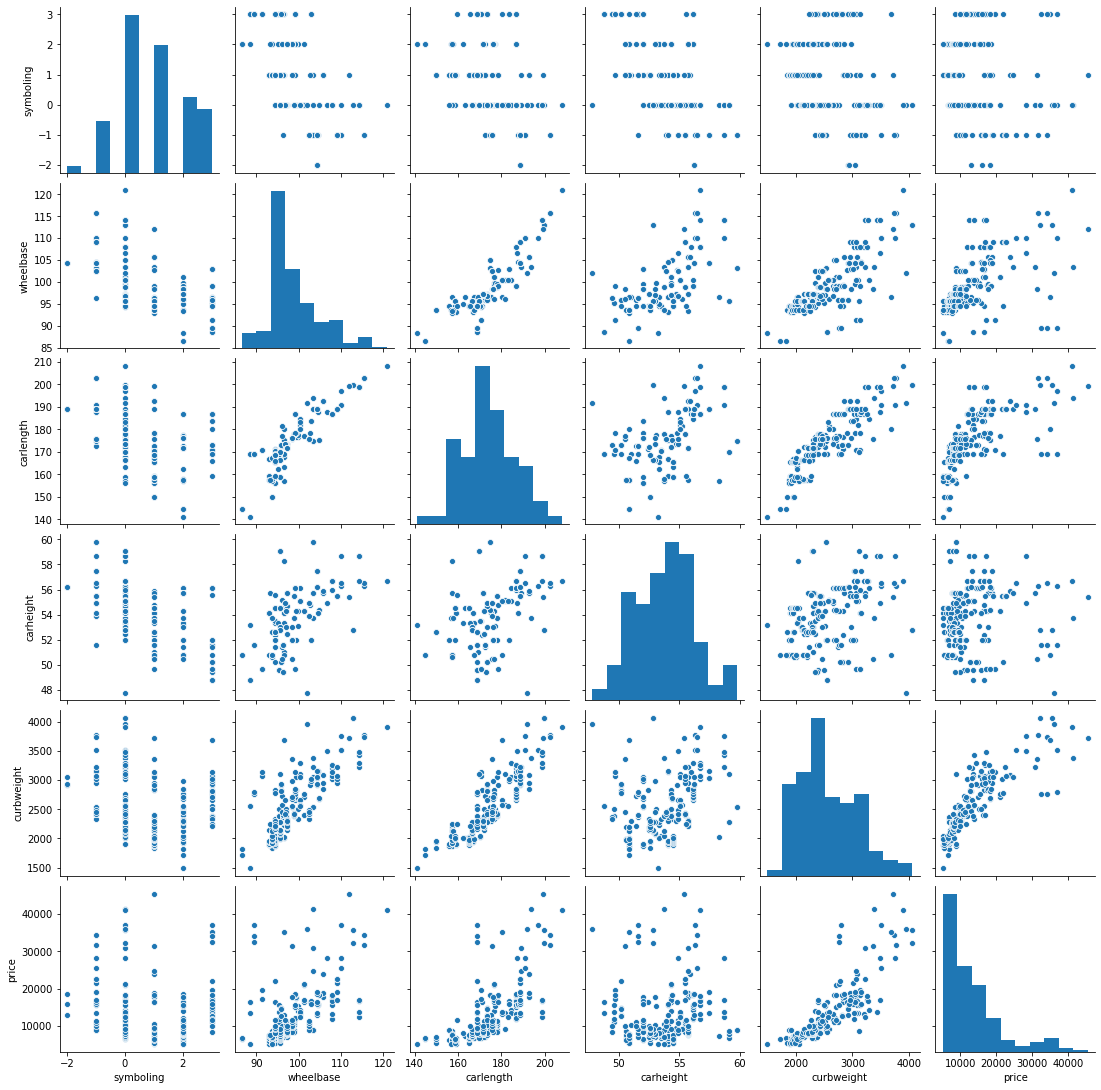

In [ ]:
sns.pairplot(features_2)

Some features looks like do no have a strong correlation let's see them better with Implot

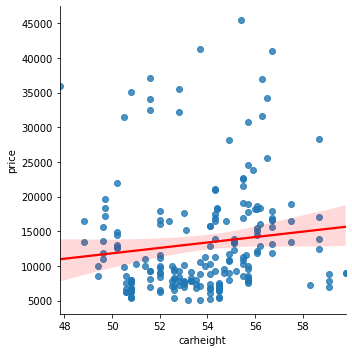

In [ ]:
sns.lmplot(x='carheight',y='price',data=features_2, line_kws={"color":"red"});

Carheight has a weak correlation with price 

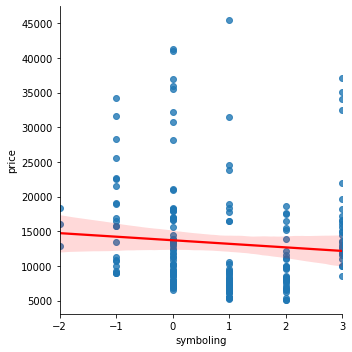

In [ ]:
sns.lmplot(x='symboling',y='price',data=features_2, line_kws={"color":"red"});

Symboling has a weak correlation with price 

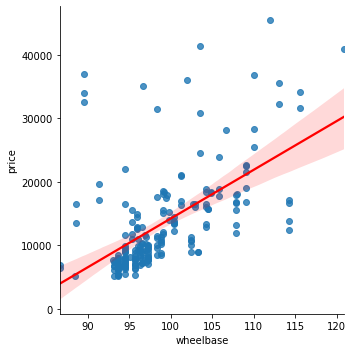

In [ ]:
sns.lmplot(x='wheelbase',y='price',data=features_2, line_kws={"color":"red"});

Wheelbase has a strong correlation with price 

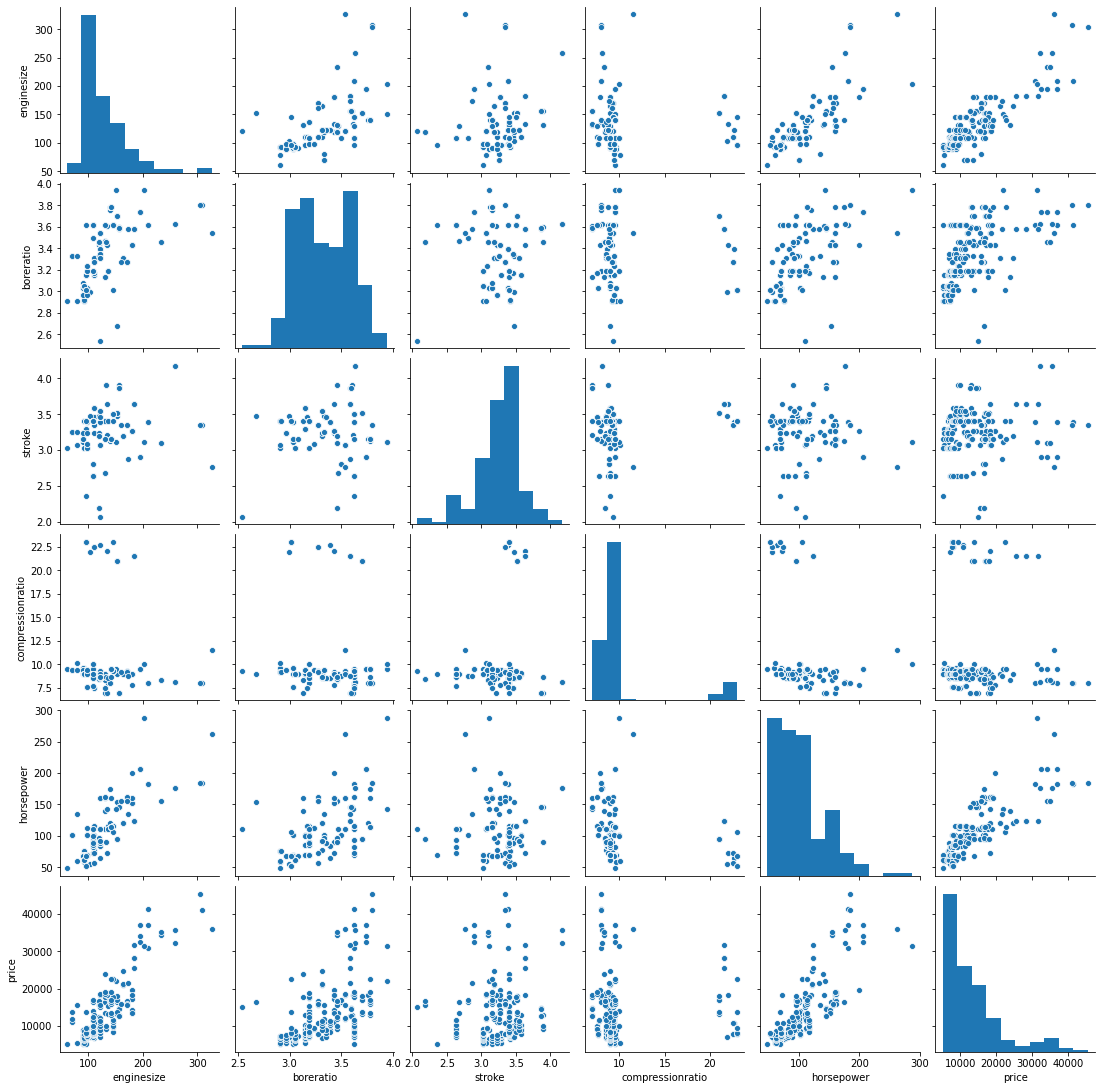

In [ ]:
sns.pairplot(features_3)

Some features looks like do no have a strong correlation let's see them better with Implot

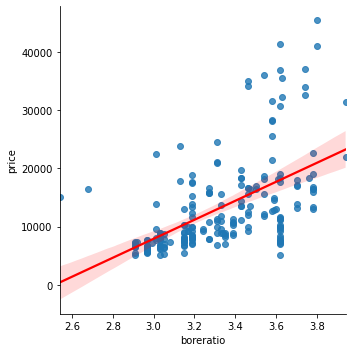

In [ ]:
sns.lmplot(x='boreratio',y='price',data=features_3, line_kws={"color":"red"});

Boreratio has a strong correlation with price.

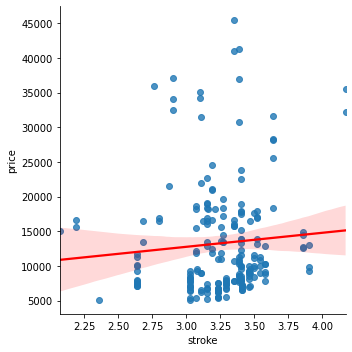

In [ ]:
sns.lmplot(x='stroke',y='price',data=features_3, line_kws={"color":"red"});

Stroke has a weak correlation with price.

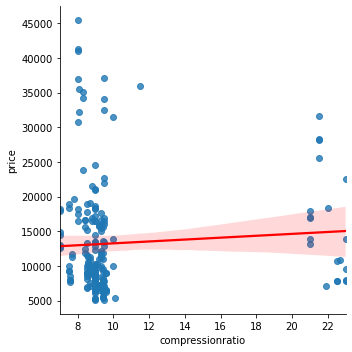

In [ ]:
sns.lmplot(x='compressionratio',y='price',data=features_3, line_kws={"color":"red"});

Compression ratio has a weak correlation with price.

We can use a Heatmap to corroborate to our pairs plot Analysis. This way we can quantify the correlation between our features.

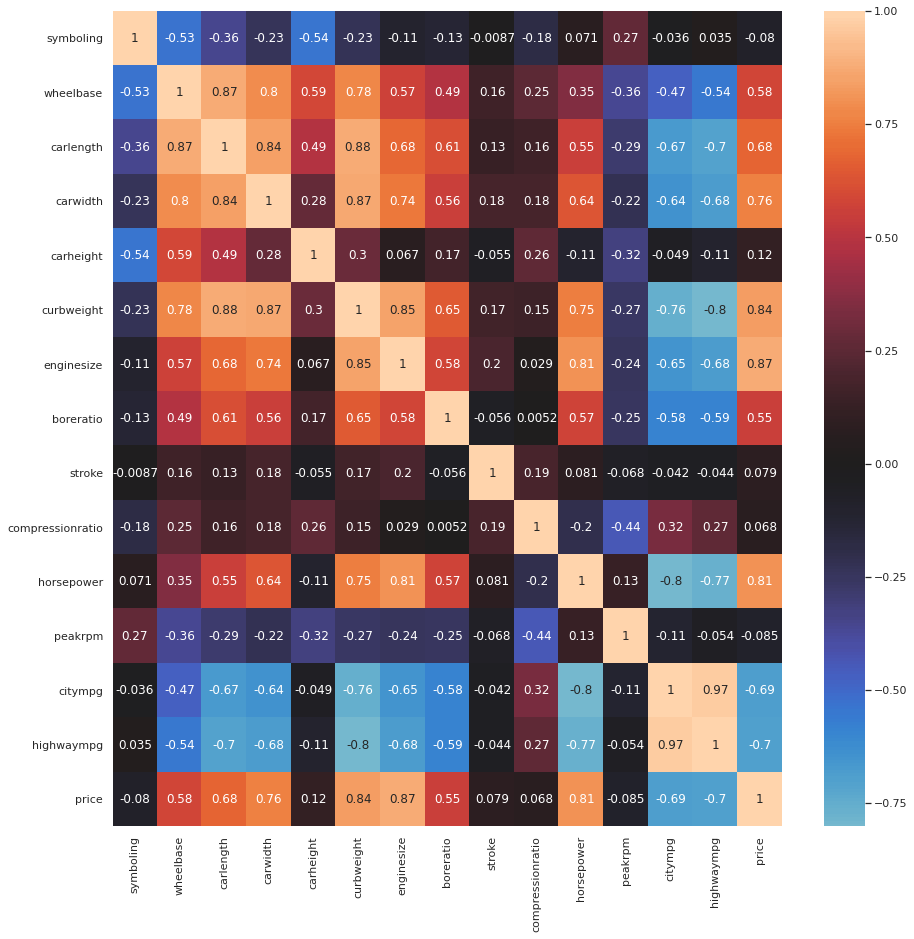

In [ ]:
plt.figure(figsize=[15,15])
sns.set(font_scale=1)
sns.heatmap(num_features.corr(),center=0,annot=True);

Here we see that symboling ,carheight, peakrpm, compressionratio and stroke have a weak correlation with price corroborating with our previus analysis. We are going to remove these features based on these two grafic analysis



verifar as estatisticas statsmodels regressão linear 

**Conclusion Exploratory analysis **

* Diesel cars are more expensive than Gasoline cars
* We only have Diesel cars with front engine 
* We only have three cars with rear engine location on our dataset
*Convertible and Hardtop cars are the most expensive models
*Cars with eight and twelve cylinders are on average more expensive
* Dohcv and Ohcv are on average more expensives

## Metrics

In [ ]:


def mede_erro(modelo, X, y):
    predicoes = modelo.predict(X_test)
    
    mae = mean_absolute_error(y_test, predicoes)
    mse = mean_squared_error(y_test, predicoes)
    rmse = np.sqrt(mse)
    
    print(modelo.__class__.__name__)
    print("MAE: ",mae)
    print("MSE: ",mse)
    print("RMSE: ",rmse)
    
    print("")

# 4. Baseline 

In [ ]:
X= df_price[['highwaympg','carwidth']]

y= df_price['price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.30,random_state = 42)

In [ ]:
model = LinearRegression(normalize=True)

In [ ]:
treino = model.fit(X_train,y_train)

In [ ]:
pre =treino.predict(X_test)



In [ ]:
mede_erro(model,X,y)


LinearRegression
MAE:  4179.7197199714465
MSE:  34991706.64685323
RMSE:  5915.3788253038565



# Feature Engineering

In [ ]:
#one_hot = OneHotEncoder()

In [ ]:
#colum_trans =one_hot.fit_transform(categ_feat).toarray()

In [ ]:
#colum_trans = pd.DataFrame(colum_trans)

In [ ]:
#colum_trans.head()

In [ ]:
#df_final = num_features.join(colum_trans)

#df_final.head()

I am going to transform categorical features into numeric features with Label encoder

In [ ]:
lab=LabelEncoder()


In [ ]:
categ_feat['fuelsystem']=lab.fit_transform(categ_feat['fuelsystem'])
categ_feat['cylindernumber']=lab.fit_transform(categ_feat['cylindernumber'])
categ_feat['enginetype']=lab.fit_transform(categ_feat['enginetype'])
categ_feat['enginelocation']=lab.fit_transform(categ_feat['enginelocation'])
categ_feat['drivewheel']=lab.fit_transform(categ_feat['drivewheel'])
categ_feat['carbody']=lab.fit_transform(categ_feat['carbody'])
categ_feat['doornumber']=lab.fit_transform(categ_feat['doornumber'])
categ_feat['aspiration']=lab.fit_transform(categ_feat['aspiration'])
categ_feat['fueltype']=lab.fit_transform(categ_feat['fueltype'])
categ_feat['CarName']=lab.fit_transform(categ_feat['CarName'])

In [ ]:
categ_feat.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,1,0,1,0,2,0,0,2,5
1,1,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,2,1,0,0,3,1,0,3,2,5
4,2,1,0,0,3,0,0,3,1,5


In [ ]:
df_final = num_features.join(categ_feat)

df_final.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,1,0,1,0,2,0,0,2,5
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,1,0,1,0,2,0,0,2,5
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,0,1,2,2,0,5,3,5
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,2,1,0,0,3,1,0,3,2,5
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,2,1,0,0,3,0,0,3,1,5


# 5. Feature Selection 

Eu parei nesse passo , aqui que eu copiei a função para fazer feature selection do notebook do pessoal do sirio libanes e fiz algumas alterações para tentar funcionar aqui mas não esta fazendo a seleção do jeito que eu gostaria o dataset tem 24 features e eu gostaria de selecionar por exemplo 10 mas se eu coloco menos que 24 na função da erro.

segue link para consulta :https://www.kaggle.com/felipeoliveiraml/stacking-gradient-boosting-pr-80

We will apply a Feature selection technique, which will help to reduce the number of features helping to contain the complexity of the model.

The criteria for selecting the features used will be through the ANOVA F-Value is a way to see which features are most statistically relevant.

In [ ]:
def feature_selection(k_value= 2, name='RandomForest', model=RandomForestRegressor(random_state=42)):


  # number features 
  k=k_value 
  f_class = functools.partial(f_classif)


  # features | label 
  X = df_final.drop('price', axis=1)
  y = df_final['price']


  # spliting 
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)


  # filter  
  seletor = SelectKBest(score_func=f_class, k=k)
  X_train2 = seletor.fit_transform(X_train, y_train)
  X_test2 = seletor.transform(X_test)

  # Random Forest  
  mdl = model
  mdl.fit(X_train, y_train)
  y_pred = mdl.predict(X_test2)

   # metrics 
  MAE = round(mean_absolute_error(y_test, y_pred),2)
  MSE = round(mean_squared_error(y_test, y_pred),2)
  RMSE = round(sqrt(MAE),2)
 
  

  print('K: {} |mean_squared_error : {}'.format(k, MSE))
  print('K: {} |mean_absolute_error: {}'.format(k, MAE))
  print('K: {} | RMSE: {}'.format(k, RMSE))
 
  
  print('\n')
  print('\n')

 



 
  mask = seletor.get_support()
  best_features = X.columns[mask]
  print('----- Best {} features {} --------'.format(k, name))
  print('\n')
  print(best_features)


In [ ]:
feature_selection(k_value=24, name='RandomForest', model=RandomForestRegressor(random_state=42))

# 6. Tuning Hyperparameters 

# 7. Validation 

Aqui também tentei fazer a mesma coisa aproveitar a função escrita pelo pessoal do sirio libanes

In [ ]:
# Cross validation function 

def cross_validation(X, model, name, cv=5):
  
  # features | class 
  X = X
  y = df_final['price']



  # StratifiedKFold 
  KFold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

  for train_index, test_index in KFold.split(X,y):
    # Train and Test 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print('Train: {}'.format(X_train.shape))
    print('Test: {}'.format(X_test.shape))
    print('\n')

    # chose model
    mdl = model
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)[:,1]


    # metrics   
    mae = mean_absolute_error(y_test , y_pred)
    mse = mean_squared_error(y_test , y_pred)
    rmse = sqrt(mse)
    
    print('----- Validation {} -----'.format(name))
    print("MAE: ",mae)
    print("MSE: ",mse)
    print("RMSE: ",rmse)
    
    print("")



In [ ]:
cross_validation(X=df_final.drop('price',axis=1),model= RandomForestRegressor,name= 'Random_forest',cv= 5)

# 8. Gradient Boosting 

# Conclusion 